# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [4]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = pd.DataFrame(target, columns=["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)


X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.012364,0.000000,0.605423,0.00,4.719223,9.712923,2.925330,1.322576,0.548434,1.676195,9.264793,4.384873,1.253988
1,0.007603,1.669108,0.958212,4.25,4.136260,10.230663,1.144392,2.037916,0.438747,1.438357,9.822914,4.400395,0.489666
2,0.014245,0.000000,4.146772,0.00,5.635308,9.057421,3.436654,0.933645,0.438747,4.026266,11.218214,4.325115,2.506589
3,0.012345,0.000000,1.615955,0.00,3.821645,9.181558,0.271315,2.642503,0.438747,1.727161,10.715906,4.333984,0.765709
4,0.685734,0.000000,2.705716,0.00,6.597659,9.532773,3.193166,1.183586,2.632483,3.771439,11.274026,4.269458,2.395616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2.534168,0.000000,2.705716,0.00,5.524267,7.006142,3.478395,0.776613,2.632483,3.771439,11.274026,0.319192,4.767651
98,1.942732,0.000000,2.705716,0.00,6.847500,9.781046,3.245342,1.000866,2.632483,3.771439,11.274026,0.304779,2.503814
99,1.892873,0.000000,2.705716,0.00,5.524267,10.077763,3.478395,0.763419,2.632483,3.771439,11.274026,0.388596,2.943543
100,0.006989,0.000000,0.671197,0.00,4.154767,9.105865,1.568756,2.212640,0.329060,1.398717,10.325222,4.390306,1.783881


In [8]:
from sklearn.manifold import TSNE

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

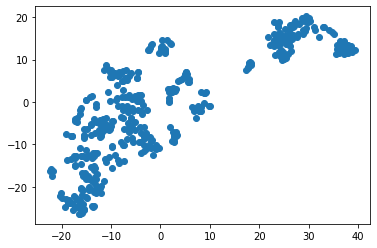

In [10]:
#Тренировочная выборка X
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter = 100)

In [12]:
X_train_labels = model.fit_predict(X_train_tsne)
centers = model.cluster_centers_


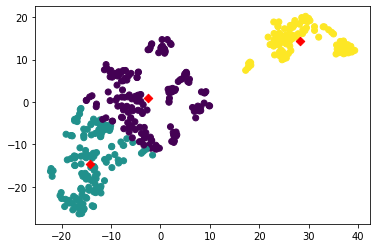

In [13]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],c=X_train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.show()

# * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [103]:
X_test_labels = model.fit_predict(X_test_tsne)
X_test_labels

array([2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1,
       1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1])

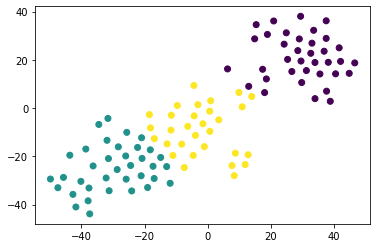

In [104]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1],c=X_test_labels)

plt.show()

In [93]:
#Создал новую таблицу, в которой есть столбец "price" 
table = pd.concat((X_test, y_test["price"]), axis=1)
table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5


In [109]:
# Преобразовал массив с кластерами 
X_test_labels_ = pd.Series(X_test_labels, index = table.index.values)

In [110]:
# Получил новую таблицу с кластерами и ценами 
table_with_clusters = pd.concat((table, X_test_labels_), axis = 1)
table_with_clusters

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,0
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,2
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,2
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,0
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,1
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,0
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,0
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2,0
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5,1


In [113]:
# Переименовал столбец
table_with_clusters.rename(columns={0: 'Cluster'}, inplace=True)
table_with_clusters

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,Cluster
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,2
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,2
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,0
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,1
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9,0
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6,0
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2,0
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5,1


In [122]:
#Среднее значение цены в разных кластерах
table_with_clusters.groupby("Cluster")["price"].mean()

Cluster
0    16.525000
1    26.980556
2    20.853333
Name: price, dtype: float64

In [123]:
#Среднее значение преступности в разных кластерах
table_with_clusters.groupby("Cluster")["CRIM"].mean()

Cluster
0    9.916293
1    0.110549
2    0.313010
Name: CRIM, dtype: float64